# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

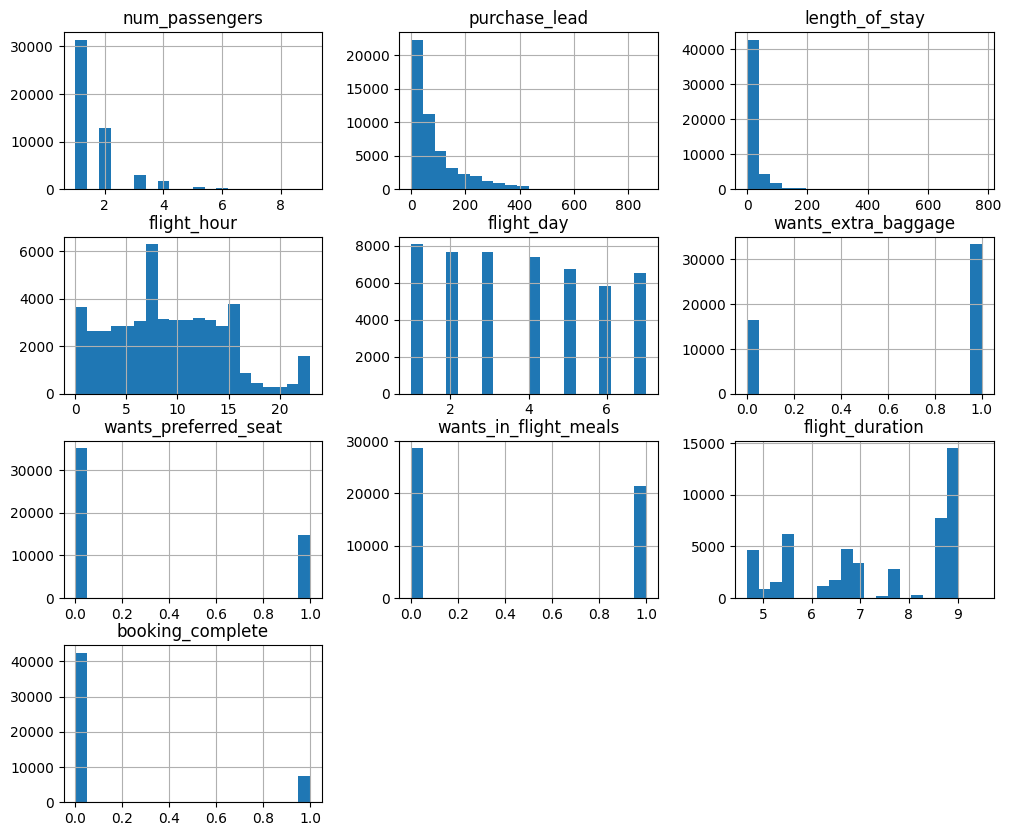

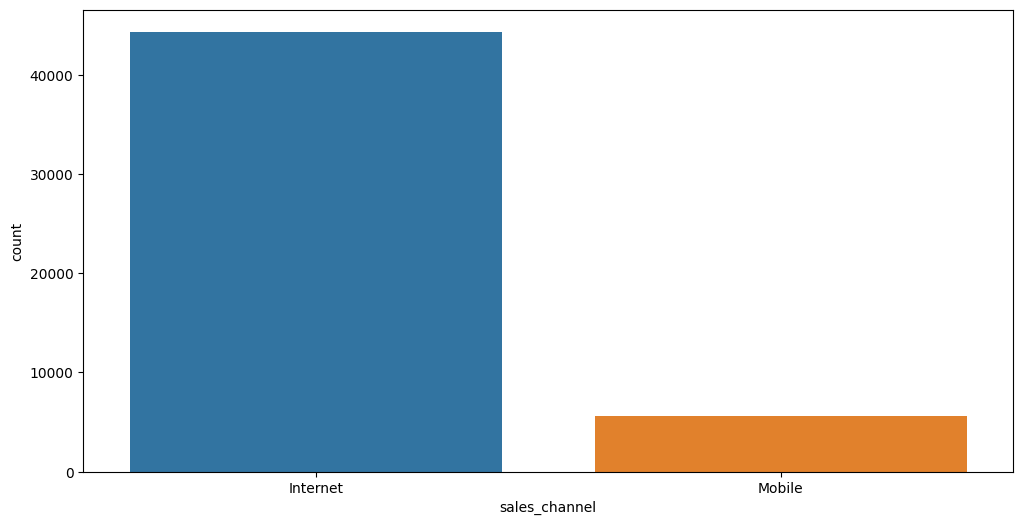

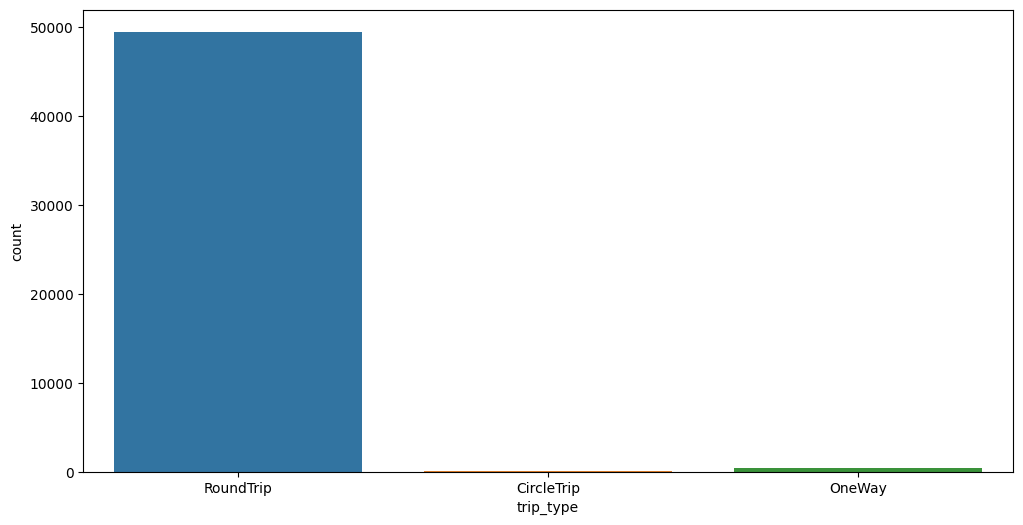

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming the data is stored in a variable called 'data')
# data = pd.read_csv('path/to/your/dataset.csv')


# Visualize the distribution of numerical columns
df.hist(bins=20, figsize=(12, 10))
plt.show()

# Visualize the count of each category in categorical columns
plt.figure(figsize=(12, 6))
sns.countplot(x='sales_channel', data=df)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='trip_type', data=df)
plt.show()

# ... Continue with visualizations for other categorical columns as needed.


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Assume the 'df' variable contains your dataset.

# Encode categorical columns with LabelEncoder
label_encoder = LabelEncoder()
df['sales_channel'] = label_encoder.fit_transform(df['sales_channel'])
df['trip_type'] = label_encoder.fit_transform(df['trip_type'])

# One-hot encode the 'route' and 'booking_origin' columns
df = pd.get_dummies(df, columns=['route', 'booking_origin'])

# Split the dataset into features (X) and target (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Initialize the models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
svm_classifier = SVC()

# Train the models
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)

SVC()

LogisticRegression Accuracy: 0.85


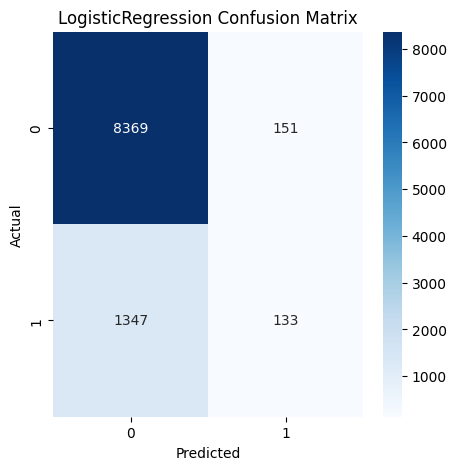

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.47      0.09      0.15      1480

    accuracy                           0.85     10000
   macro avg       0.66      0.54      0.53     10000
weighted avg       0.80      0.85      0.80     10000

LogisticRegression F1 Score: 0.15

DecisionTreeClassifier Accuracy: 0.80


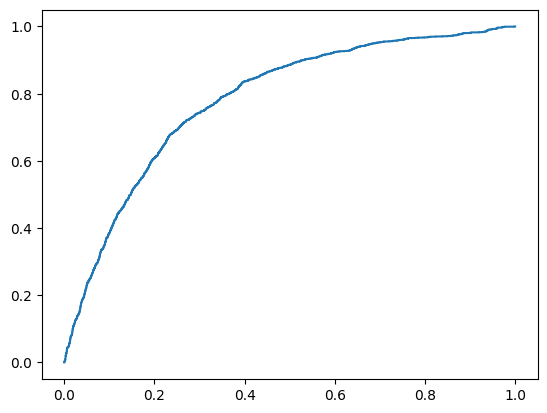

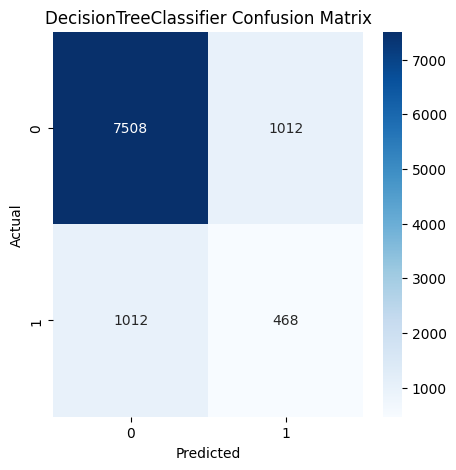

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      8520
           1       0.32      0.32      0.32      1480

    accuracy                           0.80     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.80      0.80      0.80     10000

DecisionTreeClassifier F1 Score: 0.32

RandomForestClassifier Accuracy: 0.86


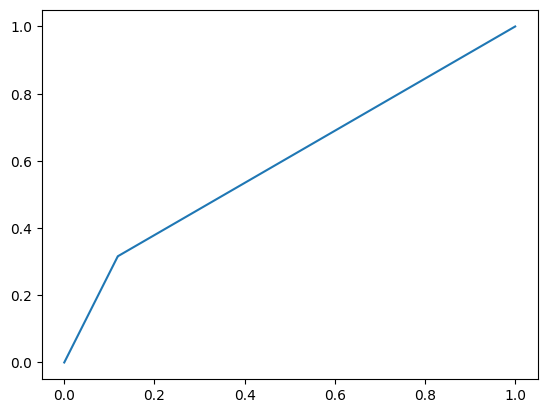

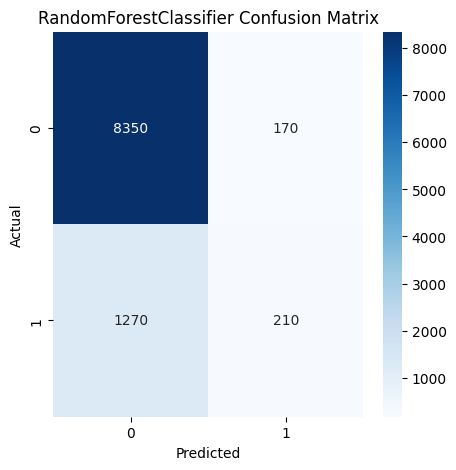

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.55      0.14      0.23      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.56      0.57     10000
weighted avg       0.82      0.86      0.82     10000

RandomForestClassifier F1 Score: 0.23

GradientBoostingClassifier Accuracy: 0.85


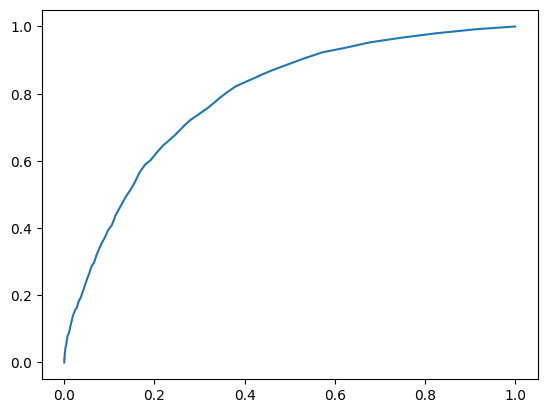

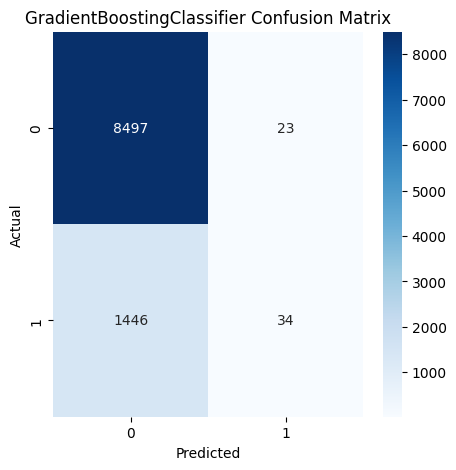

GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.60      0.02      0.04      1480

    accuracy                           0.85     10000
   macro avg       0.73      0.51      0.48     10000
weighted avg       0.82      0.85      0.79     10000

GradientBoostingClassifier F1 Score: 0.04

SVC Accuracy: 0.85


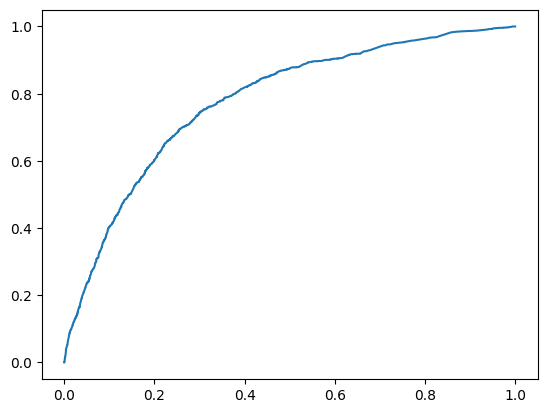

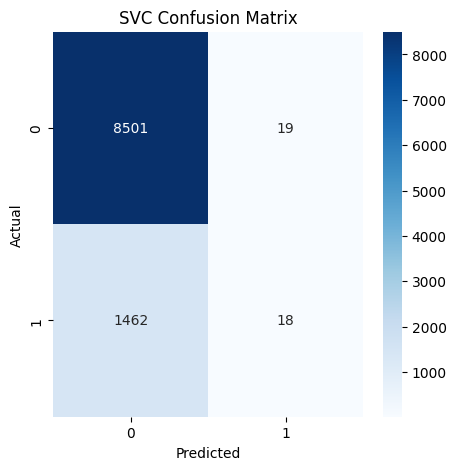

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.49      0.01      0.02      1480

    accuracy                           0.85     10000
   macro avg       0.67      0.50      0.47     10000
weighted avg       0.80      0.85      0.79     10000



AttributeError: ignored

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score
import seaborn as sns

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model.__class__.__name__} Accuracy: {accuracy:.2f}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model.__class__.__name__} Confusion Matrix')
    plt.show()

    # Classification Report
    print(f'{model.__class__.__name__} Classification Report:\n{classification_report(y_test, y_pred)}')

    # ROC and AUC
    y_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print(f'{model.__class__.__name__} F1 Score: {f1:.2f}\n')

# Evaluate each model
models = [logistic_regression, decision_tree, random_forest, gradient_boosting, svm_classifier]
for model in models:
    evaluate_model(model, X_test, y_test)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



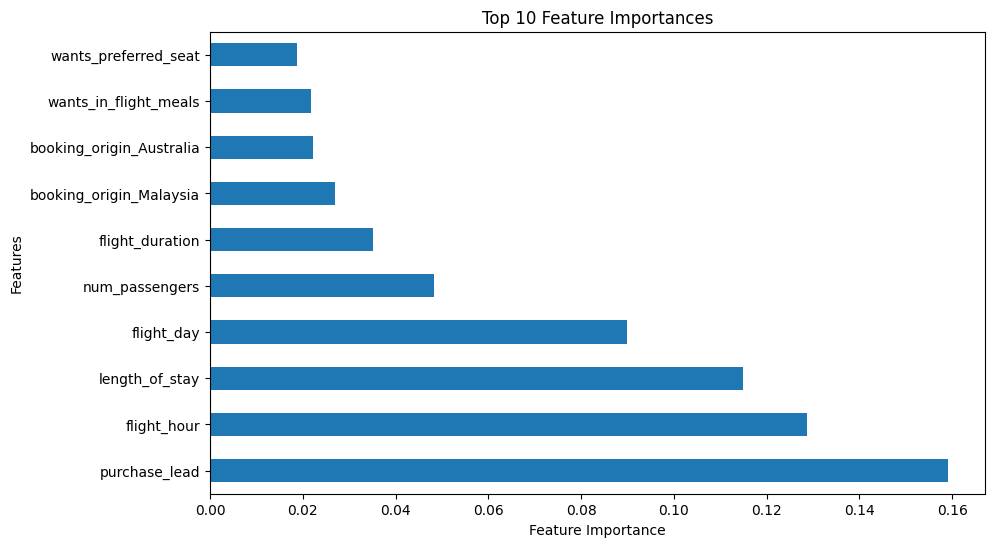

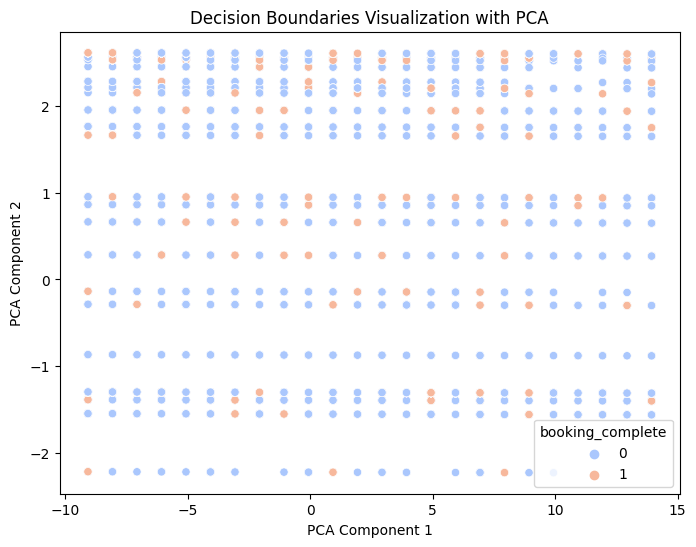

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import seaborn as sns


# Encode categorical columns with LabelEncoder
label_encoder = LabelEncoder()
df['sales_channel'] = label_encoder.fit_transform(df['sales_channel'])
df['trip_type'] = label_encoder.fit_transform(df['trip_type'])

# Split the dataset into features (X) and target (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Plot Feature Importances for the Random Forest Model
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(random_forest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.show()

# Visualize Decision Boundaries for Two Features using PCA
# I have selected two features for visualization (e.g., 'flight_hour' and 'flight_duration')
selected_features = ['flight_hour', 'flight_duration']
X_selected = X[selected_features]

# Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(data=X_pca, columns=['PCA Component 1', 'PCA Component 2'])
df_pca['booking_complete'] = y  # Adding the target back for coloring



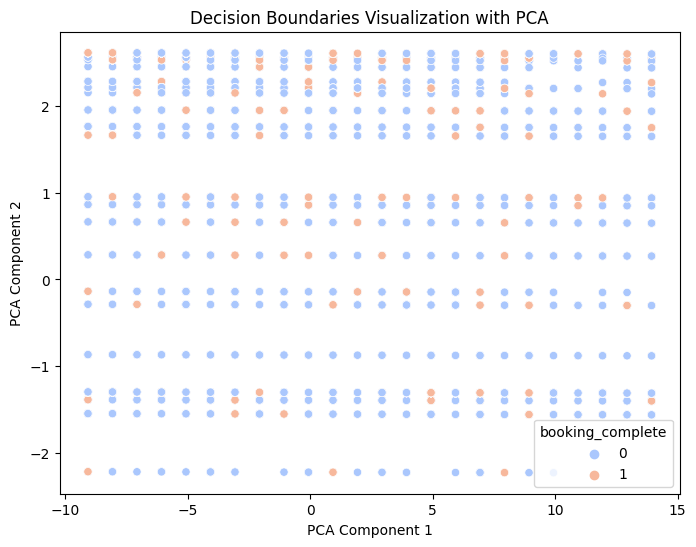

In [17]:
# Plot the data points in a 2D space
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA Component 1', y='PCA Component 2', hue='booking_complete', data=df_pca, palette='coolwarm')
plt.title('Decision Boundaries Visualization with PCA')
plt.show()

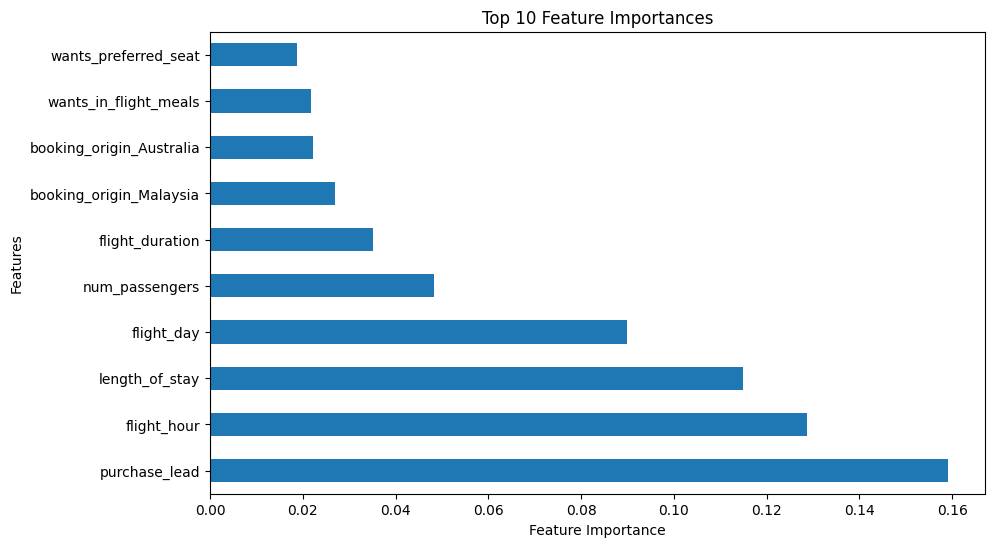

In [13]:
# Plot Feature Importances for the Random Forest Model
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(random_forest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.show()


In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load the dataset (assuming the data is stored in a variable called 'data')
# data = pd.read_csv('path/to/your/dataset.csv')

# Encode categorical columns with LabelEncoder
label_encoder = LabelEncoder()
df['sales_channel'] = label_encoder.fit_transform(df['sales_channel'])
df['trip_type'] = label_encoder.fit_transform(df['trip_type'])

# Split the dataset into features (X) and target (y)
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the Random Forest model (assuming it was the best-performing model)
random_forest = RandomForestClassifier()
random_forest.fit(X_scaled, y)

# Predicting the likelihood of customers buying a holiday
# Let's assume 'new_data' contains the data of new customers for prediction
new_data = pd.read_csv('/content/customer_booking.csv')

# Preprocess the new data
new_data['sales_channel'] = label_encoder.transform(new_data['sales_channel'])
new_data['trip_type'] = label_encoder.transform(new_data['trip_type'])
X_new = scaler.transform(new_data)

# Predict the probabilities of buying a holiday (1 indicates buying, 0 indicates not buying)
probabilities = random_forest.predict_proba(X_new)[:, 1]

# Add the probabilities to the new_data DataFrame
new_data['probability_of_purchase'] = probabilities

# Sorting the new_data DataFrame by the probability_of_purchase in descending order
sorted_data = new_data.sort_values(by='probability_of_purchase', ascending=False)

# Displaying the top 10 customers most likely to buy a holiday
top_10_customers = sorted_data.head(10)
print(top_10_customers)


UnicodeDecodeError: ignored